In [3]:
import csv
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") #suppress warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Abstract: Clinical features were observed or measured for 64 patients with breast cancer and 52 healthy controls.

breast cancer

In [4]:
data = pd.read_csv (r'dataR2.csv')   
print (data.head)

<bound method NDFrame.head of      Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  \
0     48  23.500000       70    2.707  0.467409   8.8071     9.702400   
1     83  20.690495       92    3.115  0.706897   8.8438     5.429285   
2     82  23.124670       91    4.498  1.009651  17.9393    22.432040   
3     68  21.367521       77    3.226  0.612725   9.8827     7.169560   
4     86  21.111111       92    3.549  0.805386   6.6994     4.819240   
..   ...        ...      ...      ...       ...      ...          ...   
111   45  26.850000       92    3.330  0.755688  54.6800    12.100000   
112   62  26.840000      100    4.530  1.117400  12.4500    21.420000   
113   65  32.050000       97    5.730  1.370998  61.4800    22.540000   
114   72  25.590000       82    2.820  0.570392  24.9600    33.750000   
115   86  27.180000      138   19.910  6.777364  90.2800    14.110000   

     Resistin    MCP.1  Classification  
0     7.99585  417.114               1  
1     4.064

In [5]:
data.isna().sum()


Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [6]:
data.dtypes


Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

In [7]:

data['Classification'] = data['Classification'].replace(1, 0)
data.Classification


0      0
1      0
2      0
3      0
4      0
      ..
111    2
112    2
113    2
114    2
115    2
Name: Classification, Length: 116, dtype: int64

In [8]:
data['Classification'] = data['Classification'].replace(2, 1)


In [9]:
data.Classification


0      0
1      0
2      0
3      0
4      0
      ..
111    1
112    1
113    1
114    1
115    1
Name: Classification, Length: 116, dtype: int64

In [12]:
# first we should the classfication column from the input becuae we want to predict it
X = data.drop(columns=['Classification'])

#replace target class with 0 and 1 
#1 means "have heart disease" and 0 means "do not have heart disease"
data['Classification'] = data['Classification'].replace(1, 0)
data['Classification'] = data['Classification'].replace(2, 1)
#  array of 0
y_label = data['Classification'].values.reshape(X.shape[0], 1)

#split data into train and test set
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_label, test_size=0.2, random_state=2)

#standardize the dataset
sc = StandardScaler()
sc.fit(Xtrain)
Xtrain =sc.transform(Xtrain)
Xtest = sc.transform(Xtest)

print(f"Shape of train set is {Xtrain.shape}")
print(f"Shape of test set is {Xtest.shape}")
print(f"Shape of train label is {ytrain.shape}")
print(f"Shape of test labels is {ytest.shape}")

Shape of train set is (92, 9)
Shape of test set is (24, 9)
Shape of train label is (92, 1)
Shape of test labels is (24, 1)


So we fifnsih splitting the data let build the neural network

the input layers will contain 9 nodes becuase we have 9 features

In [27]:
class NeuralNet():
    
    #A two layer neural network
          
    def __init__(self, layers=[9,5,1], learning_rate=0.001, iterations=10000):
        self.params = {}
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.loss = []
        self.sample_size = None
        self.layers = layers
        self.X = None
        self.y = None
        
    def init_weights(self):
        '''
        Initialize the weights from a random normal distribution
        '''
        np.random.seed(1) # Seed the random number generator
        self.params["W1"] = np.random.randn(self.layers[0], self.layers[1]) 
        self.params['b1']  =np.random.randn(self.layers[1],)
        self.params['W2'] = np.random.randn(self.layers[1],self.layers[2]) 
        self.params['b2'] = np.random.randn(self.layers[2],)
        
        #operation to each input element where values less than zero are set to zero.pass the proceess of production weigh and bis to RLu function

    def relu(self,Z):
        
        return np.maximum(0, Z)
    # we have binary classfication so we use sigmoid function
    def sigmoid(self,Z):
        
        return 1.0/(1.0+np.exp(-Z))
    #loss function
    def fun_loss(self,y, yhat):
        nsample = len(y)
        loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((1 - y), np.log(1 - yhat))))
        return loss
    
    #forward propagation
    def forward_propagation(self):
            
        Z1 = self.X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        yhat = self.sigmoid(Z2)
        loss = self.fun_loss(self.y,yhat)

        # save calculated parameters     
        self.params['Z1'] = Z1
        self.params['Z2'] = Z2
        self.params['A1'] = A1

        return yhat,loss
    
    def back_propagation(self,yhat):
        
        def dRelu(x):
            x[x<=0] = 0
            x[x>0] = 1
            return x
        
        dl_wrt_yhat = -(np.divide(self.y,yhat) - np.divide((1 - self.y),(1-yhat)))
        dl_wrt_sig = yhat * (1-yhat)
        dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

        dl_wrt_A1 = dl_wrt_z2.dot(self.params['W2'].T)
        dl_wrt_w2 = self.params['A1'].T.dot(dl_wrt_z2)
        dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0)

        dl_wrt_z1 = dl_wrt_A1 * dRelu(self.params['Z1'])
        dl_wrt_w1 = self.X.T.dot(dl_wrt_z1)
        dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0)
        
         #update the weights and bias
        self.params['W1'] = self.params['W1'] - self.learning_rate * dl_wrt_w1
        self.params['W2'] = self.params['W2'] - self.learning_rate * dl_wrt_w2
        self.params['b1'] = self.params['b1'] - self.learning_rate * dl_wrt_b1
        self.params['b2'] = self.params['b2'] - self.learning_rate * dl_wrt_b2
        
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.init_weights() #initialize weights and bias
            
        for i in range(self.iterations):
            yhat, loss= self.forward_propagation()
            self.back_propagation(yhat)
            self.loss.append(loss)
            
 
    def predict(self, X):
        
        Z1 = X.dot(self.params['W1']) + self.params['b1']
        A1 = self.relu(Z1)
        Z2 = A1.dot(self.params['W2']) + self.params['b2']
        pred = self.sigmoid(Z2)
        return np.round(pred)              
                              
    def acc(self, y, yhat):
        
        acc = int(sum(y == yhat) / len(y) * 100)
        return acc


    def plot_loss(self):
        
        plt.plot(self.loss)
        plt.xlabel("Iteration")
        plt.ylabel("logloss")
        plt.title("Loss curve for training")
        plt.show()
        

In [28]:
nn = NeuralNet() # create the NN model
nn.fit(Xtrain, ytrain) #train the model

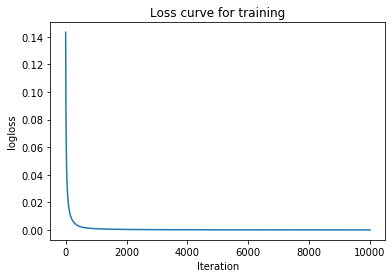

In [29]:
nn.plot_loss()


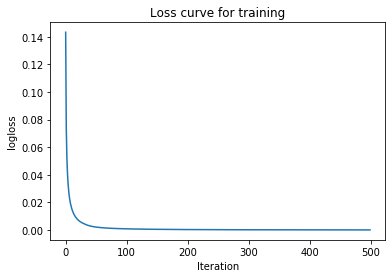

In [31]:
nn = NeuralNet(layers=[9,5,1], learning_rate=0.01, iterations=500) # create the NN model
nn.fit(Xtrain, ytrain) #train the model
nn.plot_loss()

In [32]:
train_pred = nn.predict(Xtrain)
test_pred = nn.predict(Xtest)

print("Train accuracy is {}".format(nn.acc(ytrain, train_pred)))
print("Test accuracy is {}".format(nn.acc(ytest, test_pred)))

Train accuracy is 100
Test accuracy is 100
